# 构建网络

In [1]:
from torch import nn

class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        """
        input_dim: 输入数据的维度（图片每行的像素点）
        hidden_dim: RNN神经元的个数
        layer_dim: RNN的层数
        output_dim: 隐藏层输出的维度（分类的数量）
        """
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim  # RNN神经元个数
        self.layer_dim = layer_dim   # RNN层数
        ## RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, 
                          batch_first=True, nonlinearity='relu')
        ## 连接全连接层
        self.fc1 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        """
        x: [batch, time_step, input_dim]
        本例中time_step = 图像所有像素数量 / input_dim
        """
        out, h_n = self.rnn(x, None) # None表示h0会使用全0进行初始化
        # out: [batch, time_step, output_size]
        # h_n: [layer_dim, batch, hidden_dim]
        
        """选取最后一个时间点的out输出"""
        out = self.fc1(out[:, -1, :])
        return out

# 训练前准备

In [6]:
import torch
from torch import nn, optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


# 定义超参数
Epoch = 1
batch_size = 64
time_step = 28
input_size = 28
learning_rate = 0.01

# 数据准备
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5,],[0.5,])])
train_data = datasets.MNIST(root='./data/', train=True, 
                           transform=data_transform, download=False)
test_data = datasets.MNIST(root='./data/', train=False,
                          transform=data_transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(train_data, batch_size=10000)

# 模型训练，测试

In [25]:
rnn = RNN(28, 128, 3, 10)
acc = 0
optimizer = optim.SGD(rnn.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

for epoch in range(Epoch):
    for i, (img, label) in enumerate(train_loader):
        img = img.view(-1, 28, 28)
        # 训练结果
        output_train = rnn(img)
        # 成本函数
        loss = criterion(output_train, label)
        #　梯度清零
        optimizer.zero_grad()
        # 反向传播求解
        loss.backward()
        # 参数更新
        optimizer.step()
        
        if i % 100 == 0:
            for data_test in test_loader:
                img_test, label_test = data_test
                img_test = img_test.view(-1, 28, 28)
                test_out = rnn(img_test)
                
                pred_y = torch.max(test_out, axis=1)[1]
                acc += pred_y.eq(label_test.data.view_as(pred_y)).sum()
                #acc += float(pred_y == label_test).sum() / float(label_test.size())
                print('Epoch:', epoch, 'trainloss:{}'.format(loss.data.numpy()), 'test accuracy:{}'.format(acc))

Epoch: 0 trainloss:2.314423084259033 test accuracy:947
Epoch: 0 trainloss:2.314423084259033 test accuracy:1927
Epoch: 0 trainloss:2.314423084259033 test accuracy:2880
Epoch: 0 trainloss:2.314423084259033 test accuracy:3866
Epoch: 0 trainloss:2.314423084259033 test accuracy:4850
Epoch: 0 trainloss:2.314423084259033 test accuracy:5858
Epoch: 0 trainloss:2.3025357723236084 test accuracy:6802
Epoch: 0 trainloss:2.3025357723236084 test accuracy:7778
Epoch: 0 trainloss:2.3025357723236084 test accuracy:8732
Epoch: 0 trainloss:2.3025357723236084 test accuracy:9717
Epoch: 0 trainloss:2.3025357723236084 test accuracy:10699
Epoch: 0 trainloss:2.3025357723236084 test accuracy:11709
Epoch: 0 trainloss:2.3008806705474854 test accuracy:12842
Epoch: 0 trainloss:2.3008806705474854 test accuracy:13999
Epoch: 0 trainloss:2.3008806705474854 test accuracy:15145
Epoch: 0 trainloss:2.3008806705474854 test accuracy:16290
Epoch: 0 trainloss:2.3008806705474854 test accuracy:17412
Epoch: 0 trainloss:2.3008806705

KeyboardInterrupt: 

# 代码示例

D:\Anaconda\envs\pygmt\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda\envs\pygmt\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
D:\Anaconda\envs\pygmt\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Anaconda\envs\pygmt\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


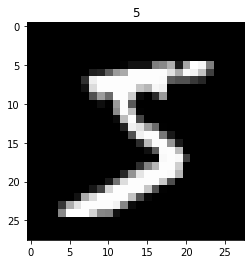

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.2825 | test accuracy: 0.14
Epoch:  0 | train loss: 1.2597 | test accuracy: 0.55
Epoch:  0 | train loss: 0.9346 | test accuracy: 0.67
Epoch:  0 | train loss: 0.7098 | test accuracy: 0.82
Epoch:  0 | train loss: 0.5380 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4440 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2233 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1943 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1189 | test accuracy: 0.93
Epoch:  0 | train loss: 0.3948 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0787 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1509 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1896 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0735 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1192 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1433 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1420 | test accurac

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul  7 12:45:39 2019

@author: ZQQ
"""

import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
# torch.manual_seed(1)    # reproducible

# Hyper Parameters，定义超参数
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64         #批训练的数量
TIME_STEP = 28          # rnn time step / image height  考虑28个时间点，一行信息包括28个像素点，
INPUT_SIZE = 28         # rnn input size / image width  每28步中的一步读取一行信息（一行信息包括28个像素点）
LR = 0.01               # learning rate
DOWNLOAD_MNIST = False  # set to True if haven't download the data

# MNIST数据集下载
train_data = dsets.MNIST(root='./data/',
                         train=True,                         # this is training data
                         transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
                         download=DOWNLOAD_MNIST,            # download it if you don't have it
                        )

test_data = dsets.MNIST(root='./data/',
                        train=False,                         # 测试集
                        transform=transforms.ToTensor()
                        )

test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array，pick 2000 samples to speed up testing

# plot其中一张手写数字图片
print(train_data.train_data.size())     # 查看训练集数据大小，60000张28*28的图片 (60000, 28, 28)
print(train_data.train_labels.size())   # 查看训练集标签大小，60000个标签 (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray') # plot 训练集第一张图片
plt.title('%i' % train_data.train_labels[0])              # 图片名称，显示真实标签，%i %d十进制整数，有区别，深入请查阅资料
plt.show()                                                # show

# Data Loader for easy mini-batch return in training
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 定义网络模型
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.LSTM(input_size=INPUT_SIZE,  # if use nn.RNN(), it hardly learns
                           hidden_size=64,         # rnn 隐藏单元
                           num_layers=1,           # rnn 层数
                           batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
                          )
        self.out = nn.Linear(64, 10)  #10分类

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

rnn = RNN() # 调用模型
print(rnn)  # 查看模型结构

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # 选择优化器，optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # 定义损失函数，the target label is not one-hotted

# 训练，测试。training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):    # gives batch data
        #print(step)  # 1,2,3,4,5,...,
        #print(b_x)   # 图片向量
        #print(b_y)    # 图片对应的标签
        b_x = b_x.view(-1, 28, 28)                      # reshape x to (batch, time_step, input_size)
        # 前向传播
        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        # 后向传播
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')
